# Tutorial 1 : Run a first scenario

## 1 - Prerequisites

In order to run this example, you'll need to:

* use python 3.7 +
* install requirements from the requirements.txt file
* install this package https://test.pypi.org/project/mplc/


In [ ]:
!pip install mplc


### Training parameters 

There are several parameters influencing how the collaborative and distributed learning is done over the datasets of the partners. The firsts we will be interested in are `epoch_count`, `minibatch_count`, and `gradient_updates_per_pass_count`. The following schema introduces well these definitions : 


![Schema epochs mini-batches gradient updates](../../img/epoch_minibatch_gradientupdates.png)

After a training iteration over a given mini-batch, the individual models of each partner are aggregated in a way that can be parametrized by `aggregation_weighting`. Here, we use the default value `'uniform'`. See the [documentation](../../doc/documentation.md) for more details.

The `multi_partner_learning_approach` parameter defines the multi-partner learning approach, among the approcach implemented. The full list and description of the different approachs usable are descripted in the documentation, here we will use the default value `'fedavg'`, which stands for federated averaging. Its functionnement is described by the following schema:
![Schema fedavg](../../img/collaborative_rounds_fedavg.png)

For tutorial purposes, we will change the default `epoch_count`, `minibatch_count` values to 10 epochs, and 3 minibatches. 

In [15]:
from mplc.scenario import Scenario
my_scenario = Scenario(partners_count = 3,
                            amounts_per_partner = [0.2, 0.5, 0.3],
                            epoch_count = 10,
                            minibatch_count = 3
                            )

2020-09-18 11:01:31.280 | DEBUG    | subtest.scenario:__init__:118 - Dataset selected: mnist
2020-09-18 11:01:31.281 | DEBUG    | subtest.scenario:__init__:131 - Computation use the full dataset for scenario #1
2020-09-18 11:01:31.282 | INFO     | subtest.scenario:__init__:299 - ### Description of data scenario configured:
2020-09-18 11:01:31.283 | INFO     | subtest.scenario:__init__:300 -    Number of partners defined: 3
2020-09-18 11:01:31.284 | INFO     | subtest.scenario:__init__:301 -    Data distribution scenario chosen: random
2020-09-18 11:01:31.285 | INFO     | subtest.scenario:__init__:302 -    Multi-partner learning approach: fedavg
2020-09-18 11:01:31.285 | INFO     | subtest.scenario:__init__:303 -    Weighting option: uniform
2020-09-18 11:01:31.286 | INFO     | subtest.scenario:__init__:304 -    Iterations parameters: 10 epochs > 3 mini-batches > 8 gradient updates per pass
2020-09-18 11:01:31.287 | INFO     | subtest.scenario:__init__:310 - ### Data loaded: mnist
2020-

## 5 - Run your scenario

The actual training phase of our federated learning example ! 

As mplc relies on tensorflow, you can use GPU, if you have one avaible. By default, mplc tries to initialize a GPU when imported

In [16]:
my_scenario.run()

2020-09-18 11:01:33.011 | INFO     | subtest.utils:init_gpu_config:144 - No GPU found
2020-09-18 11:01:40.048 | INFO     | subtest.scenario:split_data:553 - ### Splitting data among partners:
2020-09-18 11:01:40.049 | INFO     | subtest.scenario:split_data:554 -    Simple split performed.
2020-09-18 11:01:40.049 | INFO     | subtest.scenario:split_data:555 -    Nb of samples split amongst partners: 43740
2020-09-18 11:01:40.050 | INFO     | subtest.scenario:split_data:557 -    Partner #0: 8748 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-09-18 11:01:40.051 | INFO     | subtest.scenario:split_data:557 -    Partner #1: 21870 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-09-18 11:01:40.052 | INFO     | subtest.scenario:split_data:557 -    Partner #2: 13122 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-09-18 11:01:52.634 | DEBUG    | subtest.scenario:compute_batch_sizes:601 -    Compute batch sizes, partner #0: 364
2020-09-18 11:01:52.635 | DEBUG    | subtest

2020-09-18 11:04:51.294 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:628 - Epoch 01/09 > Minibatch 02/02 > Partner id #2 (2/2) > val_acc: 0.94
2020-09-18 11:04:51.303 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:336 - End of fedavg collaborative round.
2020-09-18 11:04:53.417 | INFO     | subtest.multi_partner_learning:compute_test_score:188 -    Model evaluation at the end of the epoch: ['0.193', '0.944']
2020-09-18 11:04:53.419 | DEBUG    | subtest.multi_partner_learning:compute_test_score:191 -       Checking if early stopping criteria are met:
2020-09-18 11:04:53.420 | DEBUG    | subtest.multi_partner_learning:compute_test_score:201 -          -> Early stopping criteria are not met, continuing with training.
2020-09-18 11:04:53.608 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:289 - Start new fedavg collaborative round ...
2020-09-18 11:04:53.610 | INFO     | subtest.multi_partn

2020-09-18 11:07:53.526 | INFO     | subtest.multi_partner_learning:compute_collaborative_round_fedavg:304 - (fedavg) Minibatch n°0 of epoch n°4, init aggregated model for each partner with models from previous round
2020-09-18 11:08:02.261 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:628 - Epoch 04/09 > Minibatch 00/02 > Partner id #0 (0/2) > val_acc: 0.97
2020-09-18 11:08:13.919 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:628 - Epoch 04/09 > Minibatch 00/02 > Partner id #1 (1/2) > val_acc: 0.98
2020-09-18 11:08:24.898 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:628 - Epoch 04/09 > Minibatch 00/02 > Partner id #2 (2/2) > val_acc: 0.97
2020-09-18 11:08:24.912 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:336 - End of fedavg collaborative round.
2020-09-18 11:08:24.915 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_

2020-09-18 11:11:43.663 | INFO     | subtest.multi_partner_learning:compute_collaborative_round_fedavg:304 - (fedavg) Minibatch n°1 of epoch n°6, init aggregated model for each partner with models from previous round
2020-09-18 11:11:53.296 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:628 - Epoch 06/09 > Minibatch 01/02 > Partner id #0 (0/2) > val_acc: 0.97
2020-09-18 11:12:05.787 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:628 - Epoch 06/09 > Minibatch 01/02 > Partner id #1 (1/2) > val_acc: 0.97
2020-09-18 11:12:14.921 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:628 - Epoch 06/09 > Minibatch 01/02 > Partner id #2 (2/2) > val_acc: 0.98
2020-09-18 11:12:14.930 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:336 - End of fedavg collaborative round.
2020-09-18 11:12:14.932 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_

2020-09-18 11:14:54.225 | INFO     | subtest.multi_partner_learning:compute_collaborative_round_fedavg:304 - (fedavg) Minibatch n°2 of epoch n°8, init aggregated model for each partner with models from previous round
2020-09-18 11:15:03.015 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:628 - Epoch 08/09 > Minibatch 02/02 > Partner id #0 (0/2) > val_acc: 0.98
2020-09-18 11:15:14.639 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:628 - Epoch 08/09 > Minibatch 02/02 > Partner id #1 (1/2) > val_acc: 0.98
2020-09-18 11:15:22.753 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:628 - Epoch 08/09 > Minibatch 02/02 > Partner id #2 (2/2) > val_acc: 0.98
2020-09-18 11:15:22.761 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:336 - End of fedavg collaborative round.
2020-09-18 11:15:24.878 | INFO     | subtest.multi_partner_learning:compute_test_score:188 -    

0

## 6 - Explore the results

A scenario can be exported to dataframe format, to see the different parameters, and some results. 

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

df_results = my_scenario.to_dataframe()
df_results.head()

,aggregation_weighting,dataset_fraction_per_partner,dataset_name,epoch_count,final_relative_nb_samples,gradient_updates_per_pass_count,is_early_stopping,learning_computation_time_sec,minibatch_count,mpl_nb_epochs_done,mpl_test_score,multi_partner_learning_approach,nb_samples_used,partners_count,samples_split_description,scenario_name,short_scenario_name,test_data_samples_count,train_data_samples_count
0,uniform,"[0.2, 0.5, 0.3]",mnist,10.0,"[0.2, 0.5, 0.3]",8.0,1.0,908.220228,3.0,10.0,0.988,fedavg,43740.0,3.0,random,scenario_1_repeat_1_2020-09-18_11h01_86e,"3 [0.2, 0.5, 0.3]",10000.0,54000.0


 First, our federated model score (computed on the global test set)

In [37]:
print("Approach used :", df_results.multi_partner_learning_approach[0])
print("Model accuracy :", df_results.mpl_test_score[0])

Approach used : fedavg
Model accuracy : 0.9879999756813049


Let's see how our loss behaves (here the loss is computed on the global validation set)

Text(0.5, 1.0, 'Loss on the collaborative model')

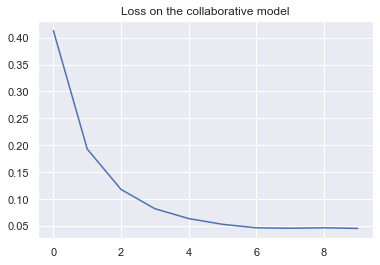

In [39]:
losses = my_scenario.mpl.loss_collective_models
epochs = np.arange(my_scenario.epoch_count)
ax = plt.plot(epochs, losses)
ax.set(xlabel='epochs', ylabel='loss', title='Loss on the collaborative model')

One can be interested on the behaviour of the accuracy score of each partner through the epochs. 
These information are stored in the score_matrix_per_partner. The structure of the tensor is the following : score\[epoch_index, minibatch_index, partner_index\]
We average the score per minibatches. The score is computed on the global validation set. 

In [64]:
scores = my_scenario.mpl.score_matrix_per_partner.mean(axis = 1)

In [66]:
scores_df = pd.DataFrame({
    f'partner {i}':scores[:,i] for i in range(my_scenario.partners_count) })
scores_df

,partner 0,partner 1,partner 2
0,0.843778,0.835444,0.819556
1,0.898833,0.922333,0.910111
2,0.955667,0.952278,0.950278
3,0.962889,0.971333,0.969000
4,0.973444,0.975056,0.971444
5,0.975889,0.980000,0.977389
6,0.976056,0.976667,0.980056
7,0.982389,0.982833,0.981500
8,0.982000,0.983056,0.977778
9,0.980556,0.984833,0.982778


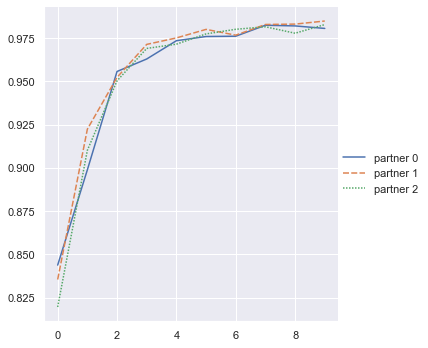

In [69]:
sns.relplot(data = scores_df, kind="line")

And what about the result of the collective model, compared to the partner models ?

In [75]:
score_collective = my_scenario.mpl.score_matrix_collective_models.mean(axis=1)
scores_df['collective model'] = score_collective
scores_df

,partner 0,partner 1,partner 2,collective model
0,0.843778,0.835444,0.819556,0.673917
1,0.898833,0.922333,0.910111,0.914500
2,0.955667,0.952278,0.950278,0.956583
3,0.962889,0.971333,0.969000,0.972375
4,0.973444,0.975056,0.971444,0.979417
5,0.975889,0.980000,0.977389,0.982958
6,0.976056,0.976667,0.980056,0.984375
7,0.982389,0.982833,0.981500,0.987000
8,0.982000,0.983056,0.977778,0.986292
9,0.980556,0.984833,0.982778,0.987000


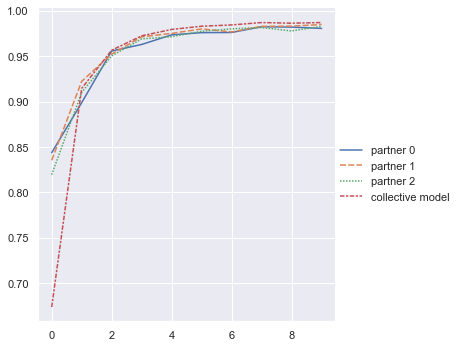

In [76]:
ax = sns.relplot(data = scores_df, kind="line")
ax.set(xlabel='epochs', ylabel='accuracy', title='Accuracy evolution through the epochs')

One can denote that the local models are better at start, but after few epochs, the collective model shows better abilities to generalize. 

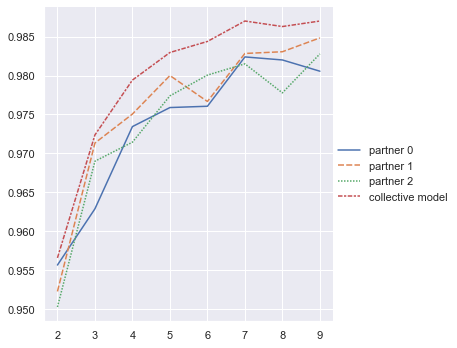

In [78]:
ax = sns.relplot(data = scores_df.iloc[2:], kind="line")
ax.set(xlabel='epochs', ylabel='accuracy', title='Accuracy evolution through the epochs')

## 7 - Extract the model 

Finally, we can extract our model, use it a bit, on the test set for instance, and save it for later

In [79]:
model = my_scenario.mpl.get_model()

In [80]:
x_test = my_scenario.dataset.x_test
y_test = my_scenario.dataset.y_test
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 339us/step


[0.03768708155953791, 0.9879999756813049]

# That's it !

Now you can explore our other tutorials for a better snapshot of what can be done with our library!

This work is collaborative, enthusiasts are welcome to comment open issues and PRs or open new ones.

Should you be interested in this open effort and would like to share any question, suggestion or input, you can use the following channels:

- This Github repository (issues or PRs)
- Substra Foundation's [Slack workspace](https://substra-workspace.slack.com/join/shared_invite/zt-cpyedcab-FHYgpy08efKJ2FCadE2yCA), channel `#workgroup-mpl-contributivity`
- Email: hello@substra.org
- Come meet with us at La Paillasse (Paris, France), Le Palace (Nantes, France) or Studio Iconosquare (Limoges, France)

 ![logo Substra Foundation](./img/substra_logo_couleur_rvb_w150px.png)
